In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.random import set_seed

# metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score
)


In [124]:
#dat = pd.read_csv("https://media.githubusercontent.com/media/buds-lab/building-data-genome-project-2/refs/heads/master/data/meters/raw/electricity.csv")
dat = pd.read_csv("cleaned_electricity.csv")
dat = dat[dat.columns.difference(["timestamp","month","year","total_energy","z_score","is_anomaly"])]

In [125]:
# inspecting the dataset
dat

,Bear_assembly_Angel,Bear_assembly_Beatrice,Bear_assembly_Diana,Bear_assembly_Genia,Bear_assembly_Jose,Bear_assembly_Roxy,Bear_assembly_Ruby,Bear_education_Alfredo,Bear_education_Alvaro,Bear_education_Arnold,...,Wolf_office_Emanuel,Wolf_office_Haydee,Wolf_office_Joana,Wolf_office_Nadia,Wolf_office_Rochelle,Wolf_public_Norma,Wolf_retail_Harriett,Wolf_retail_Marcella,Wolf_retail_Toshia,Wolf_science_Alfreda
0,237.8500,9.00,1.148,178.7858,148.50,9.75,51.50,0.1025,358.4388,0.519,...,13.3400,4.9100,14.6900,50.9975,8.8600,72.8408,22.7300,9.8575,17.6575,87.6400
1,221.2500,10.25,1.148,184.0738,152.00,9.75,52.75,0.0950,355.8990,0.521,...,13.7975,5.1200,14.2425,49.9775,8.9625,67.0392,22.0200,9.6150,18.5775,87.1525
2,222.5000,10.00,1.148,184.9768,153.25,10.00,51.25,0.1025,328.1848,0.590,...,13.3550,4.7325,14.8850,49.3350,8.8200,72.3000,22.1100,9.4900,18.1275,86.9800
3,221.4000,9.00,1.148,184.6900,145.50,9.75,51.00,0.1025,326.3410,0.539,...,13.4625,6.6975,15.3775,50.6450,8.7475,74.5700,21.5050,9.6125,17.4000,87.1375
4,224.2500,10.00,1.148,187.0248,158.25,10.00,51.50,0.1175,325.4633,0.532,...,13.2375,7.0000,15.3375,50.9975,8.4475,71.1233,21.6750,9.4300,17.3875,86.6425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17517,319.2544,67.25,0.485,403.5352,226.50,7.00,68.75,0.1350,371.8235,0.674,...,10.1650,4.7800,15.3300,57.1650,7.2850,56.5333,27.8675,5.4975,18.1000,72.4275
17518,313.7506,66.25,0.429,396.6962,223.00,6.50,68.75,0.1300,371.2127,0.694,...,10.1250,4.7750,15.1600,56.0575,7.3775,63.7867,28.2650,5.2050,18.5750,73.4875
17519,309.0006,67.75,0.503,305.9935,163.50,6.25,68.00,0.1300,375.0352,0.665,...,10.1675,4.7925,14.8750,62.7975,7.1525,63.0400,28.2425,5.4175,19.0250,72.7675
17520,284.5062,41.00,0.424,195.5648,134.25,6.50,68.50,0.1325,371.4132,0.651,...,9.7475,4.5150,14.4775,54.6325,7.1075,62.6133,27.7850,5.0675,18.2100,72.5375


In [126]:
n_obs = dat.shape[0]
dat.describe()

,Bear_assembly_Angel,Bear_assembly_Beatrice,Bear_assembly_Diana,Bear_assembly_Genia,Bear_assembly_Jose,Bear_assembly_Roxy,Bear_assembly_Ruby,Bear_education_Alfredo,Bear_education_Alvaro,Bear_education_Arnold,...,Wolf_office_Emanuel,Wolf_office_Haydee,Wolf_office_Joana,Wolf_office_Nadia,Wolf_office_Rochelle,Wolf_public_Norma,Wolf_retail_Harriett,Wolf_retail_Marcella,Wolf_retail_Toshia,Wolf_science_Alfreda
count,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,...,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000
mean,476.679703,42.944489,0.894875,263.293742,257.241995,17.080773,69.356659,0.181286,419.656757,0.558994,...,15.081831,8.626523,14.815788,74.248859,16.077133,146.559584,43.702334,7.002205,70.893180,81.415206
std,167.623822,15.610472,0.345937,83.127254,72.219683,13.478723,13.240294,0.090476,61.844445,0.363623,...,6.285490,5.943523,4.982215,22.476497,8.903942,73.023355,19.960541,3.235558,50.605333,11.897054
min,36.500000,1.750000,0.000000,151.320800,126.000000,0.000000,34.750000,0.050000,219.976000,0.000000,...,0.000000,0.000000,0.000000,28.155000,0.000000,17.325000,0.000000,0.002500,7.285000,0.000000
25%,333.250075,34.250000,0.613000,205.980900,194.250000,9.250000,60.500000,0.117500,373.594475,0.363000,...,11.180000,4.410000,11.886250,57.481250,9.005000,79.401675,27.737500,4.697500,30.342500,73.342500
50%,469.545953,37.500000,0.734000,235.312750,249.000000,12.000000,68.250000,0.157500,418.574700,0.464000,...,13.267500,6.345000,14.887500,63.441250,12.277500,135.229550,39.858750,6.122500,39.860000,78.605000
75%,608.750000,55.000000,1.148000,287.045000,313.500000,19.000000,78.250000,0.217500,465.151750,0.545000,...,18.936875,10.890000,17.346875,93.616875,22.691250,205.830850,57.937500,8.625000,119.115625,88.070000
max,1105.600000,83.000000,2.514000,613.510000,533.250000,75.398000,118.000000,0.630000,600.598800,2.427000,...,45.545000,38.472500,30.580000,162.755000,45.350000,330.001700,130.637500,22.645000,206.440000,124.375000


In [127]:
names = [name.split("_") for name in dat.columns]

# restricting the data to a particular location or use
sub_dfs = dict([])

for use in set([name[1] for name in names]):
  print(use)
  use_inds = np.argwhere(np.array([name[1] == use for name in names])).flatten()
  sub_dfs[use] = dat[dat.columns[use_inds]]

assembly
warehouse
industrial
parking
utility
science
services
retail
office
lodging
education
food
religion
other
public
health


In [128]:
for building in set([name[0] for name in names]):
  print(building)
  building_inds = np.argwhere(np.array([name[0] == building for name in names])).flatten()
  sub_dfs[building] = dat[dat.columns[building_inds]]

Cockatoo
Peacock
Fox
Lamb
Bobcat
Wolf
Bear
Mouse
Panther
Gator
Rat
Crow
Moose
Robin
Shrew
Eagle
Hog
Bull


In [129]:
sub_dfs["Panther"]

,Panther_assembly_Carrol,Panther_assembly_David,Panther_assembly_Denice,Panther_assembly_Gwyneth,Panther_assembly_Pamella,Panther_education_Alecia,Panther_education_Annetta,Panther_education_Aurora,Panther_education_Cleopatra,Panther_education_Diann,...,Panther_parking_Jody,Panther_parking_Lorriane,Panther_parking_Mellissa,Panther_parking_Stanley,Panther_retail_Felix,Panther_retail_Gilbert,Panther_retail_Kristina,Panther_retail_Lester,Panther_retail_Rachel,Panther_retail_Romeo
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.6030,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7230,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.0831,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7230,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7230,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17517,11.3022,43.0083,624.3205,236.2456,129.0249,160.0309,79.2153,68.0131,11.2422,32.1062,...,44.2485,15.4830,18.8036,57.7111,67.0199,0.6401,17.9975,4.7189,1.7203,401.8495
17518,16.4032,38.6074,585.8131,237.8459,129.2249,142.0274,91.2176,67.8131,11.2022,32.7063,...,44.1685,12.7224,18.4035,57.4111,56.6869,0.7301,18.7866,4.7149,1.4403,404.1720
17519,12.6024,38.2074,570.8102,203.8393,129.6250,148.0286,89.2172,69.0133,11.2822,34.8067,...,44.0085,11.2822,18.2435,57.3111,55.0576,0.7201,18.4526,4.7029,2.0004,406.7715
17520,11.6022,36.0069,490.6947,182.4352,128.4248,156.0301,87.1168,67.8131,11.1622,34.9067,...,44.0885,16.9233,20.4840,57.6111,49.6776,0.7201,18.2605,4.6339,1.7203,403.3688


Epoch 1/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0143
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 9.5712e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 9.0027e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Cockatoo with units 10 =====
 Train →  MAE: 1.698, RMSE: 2.299, MAPE: 1.264%, R²: 0.984, ExplVar: 0.984
 Test  →  MAE: 1.701,  RMSE: 2.272,  MAPE: 1.294%,  R²: 0.984,  ExplVar: 0.984
Epoch 1/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0089
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 9.3704e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 8.8059e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Cockatoo with units 25 =====
 Train →  MAE: 1.705, RMSE: 2.282, MAPE: 1.269%, R²: 0.984, ExplVar: 0.984
 Test  →  MAE: 1.704,  RMSE: 2.253,  MAPE: 1.295%,  R²: 0.984,  ExplVar

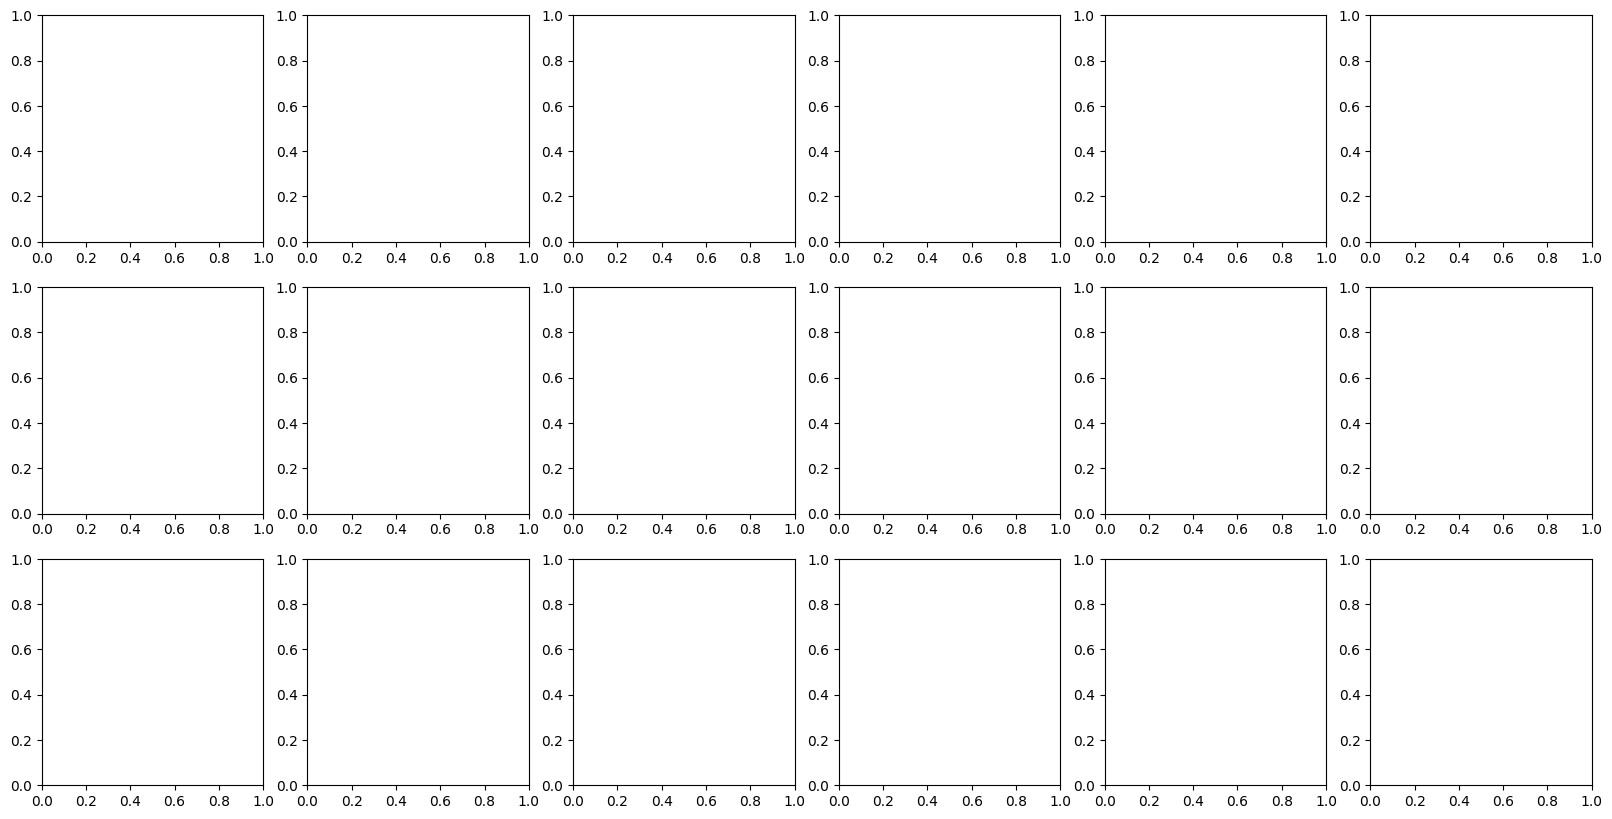

In [130]:
# compute metrics
def compute_metrics(true, pred):
    mae  = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred)
    r2   = r2_score(true, pred)
    ev   = explained_variance_score(true, pred)
    return mae, rmse, mape, r2, ev

fig, ax = plt.subplots(3,6, figsize=(20,10))
locations = list(set([name[0] for name in names]))

models10 = dict([])
models25 = dict([])
test10 = dict([])               # metric to compare models (we'll use MSE to both train and compare)
test25 = dict([])
models = {10: models10, 25: models25}
test = {10: test10, 25: test25}

set_seed(123)                   # set seed for reproducibility, right before using tensorflow functions

for i in range(len(locations)):
  # LSTM is sensitive to scale
  avg_series = sub_dfs[locations[i]].mean(axis=1)   # combine all sequence with a certain location into one sequence to train lstm
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_series = scaler.fit_transform(np.array(avg_series).reshape(-1, 1))

  train_size = int(n_obs * 0.8)
  train_scaled = scaled_series[:train_size]
  test_scaled = scaled_series[train_size:]


  # Y is the sequence; for every element of Y, X has a list with the previous look_back entries
  def create_dataset(dataset, look_back=1):
      X, Y = [], []
      for i in range(len(dataset) - look_back - 1):
          a = dataset[i:(i + look_back), 0]
          X.append(a)
          Y.append(dataset[i + look_back, 0])
      return np.array(X), np.array(Y)

  look_back = 4       # informed by arimax giving p = 3, or 4 with small coefficient

  X_train, Y_train = create_dataset(train_scaled, look_back)
  X_test, Y_test = create_dataset(test_scaled, look_back)

  # Reshape input to be [samples, time steps, features] which is required for LSTM
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # Building the LSTM model
  for u in [10,25]:
    model = Sequential()
    model.add(LSTM(units=u))
    #model.add(LSTM(units=25))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=3, batch_size=1, verbose=1)
    models[u][locations[i]] = model

    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions to original scale
    train_predict = scaler.inverse_transform(train_predict)
    real_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    real_test = scaler.inverse_transform([Y_test])

    # flatten everything
    y_train_true  = real_train.flatten()
    y_train_pred  = train_predict.flatten()
    y_test_true   = real_test.flatten()
    y_test_pred   = test_predict.flatten()

    #ax[i//6,i%6].plot(y_test_true - y_test_pred)
    #ax[i//6,i%6].set_title(locations[i])

    train_mae, train_rmse, train_mape, train_r2, train_ev = compute_metrics(y_train_true, y_train_pred)
    test_mae,  test_rmse,  test_mape,  test_r2,  test_ev  = compute_metrics(y_test_true,  y_test_pred)
    test[u][locations[i]] = test_rmse

    # print or log them per building
    print(f"===== Metrics for {locations[i]} with units {u} =====")
    print(f" Train →  MAE: {train_mae:.3f}, RMSE: {train_rmse:.3f}, MAPE: {train_mape:.3%}, R²: {train_r2:.3f}, ExplVar: {train_ev:.3f}")
    print(f" Test  →  MAE: {test_mae:.3f},  RMSE: {test_rmse:.3f},  MAPE: {test_mape:.3%},  R²: {test_r2:.3f},  ExplVar: {test_ev:.3f}")

In [131]:
np.array(list(test10.values())) - np.array(list(test25.values()))

array([ 1.89574766e-02,  3.82989559e-02,  4.86980467e-03,  7.20830605e-02,
        2.66374622e-02, -3.26793301e-01,  8.02050825e-02,  1.68300161e+01,
        6.62963586e-02, -1.44458576e-02, -5.74572266e-02, -8.10859843e-02,
        4.13219290e-01, -1.19754705e-01, -7.38174669e-01, -1.28738106e-03,
        2.62366724e-02,  3.88977540e-01])

In [132]:
test10

{'Cockatoo': 2.2719211170399003,
 'Peacock': 3.3177615173294948,
 'Fox': 4.736176529379928,
 'Lamb': 1.7601040737779077,
 'Bobcat': 8.363658074703638,
 'Wolf': 5.264507591058752,
 'Bear': 2.7546337883098557,
 'Mouse': 102.76339104338726,
 'Panther': 2.892810555914378,
 'Gator': 1.7751803534822972,
 'Rat': 2.381450013840339,
 'Crow': 10.435098475735911,
 'Moose': 29.84630113258368,
 'Robin': 3.2360299323957937,
 'Shrew': 0.973118782043457,
 'Eagle': 8.653256745876808,
 'Hog': 8.243999085374757,
 'Bull': 31.79988621786395}

In [133]:
test25

{'Cockatoo': 2.2529636404592157,
 'Peacock': 3.279462561414357,
 'Fox': 4.7313067247135985,
 'Lamb': 1.688021013288635,
 'Bobcat': 8.337020612472106,
 'Wolf': 5.5913008918053215,
 'Bear': 2.674428705813463,
 'Mouse': 85.93337490055552,
 'Panther': 2.8265141972764316,
 'Gator': 1.7896262110494219,
 'Rat': 2.438907240471035,
 'Crow': 10.51618446005953,
 'Moose': 29.433081842439982,
 'Robin': 3.3557846373245868,
 'Shrew': 1.7112934513433342,
 'Eagle': 8.654544126934033,
 'Hog': 8.21776241293646,
 'Bull': 31.41090867775916}

In [134]:
# for each location we trained 2 models, choose whichever had better MSE
better_model = dict([])
for i in locations:
  if test10[i] < test25[i]:
    better_model[i] = models[10][i]
    print(i)
  else:
    better_model[i] = models[25][i]

Wolf
Gator
Rat
Crow
Robin
Shrew
Eagle


548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Bobcat_lodging_Darin → MAE: 8.648, RMSE: 13.528, R²: 0.839, ExplVar: 0.845
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fox_education_Wendell → MAE: 6.911, RMSE: 18.925, R²: 0.769, ExplVar: 0.778
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Bull_education_Mervin → MAE: 10.631, RMSE: 19.209, R²: 0.784, ExplVar: 0.786
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Lamb_assembly_Corliss → MAE: 1.905, RMSE: 3.756, R²: 0.883, ExplVar: 0.885
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fox_education_Vernon → MAE: 22.735, RMSE: 24.229, R²: 0.131, ExplVar: 0.824
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Bull_office_Anne → MAE: 3.259, RMSE: 3.820, R²: -0.032, ExplVar: 0.637
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Bear_parking_Gordon → MAE: 0.178, RMSE: 0.307, R²: 0.829, ExplVar: 0.829
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Hog_office_Marilyn → MAE: 1.788, RMSE: 2.568, R²: 0.957, ExplVar: 0.965
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Panther_retail_Lester → MAE: 0.912, 

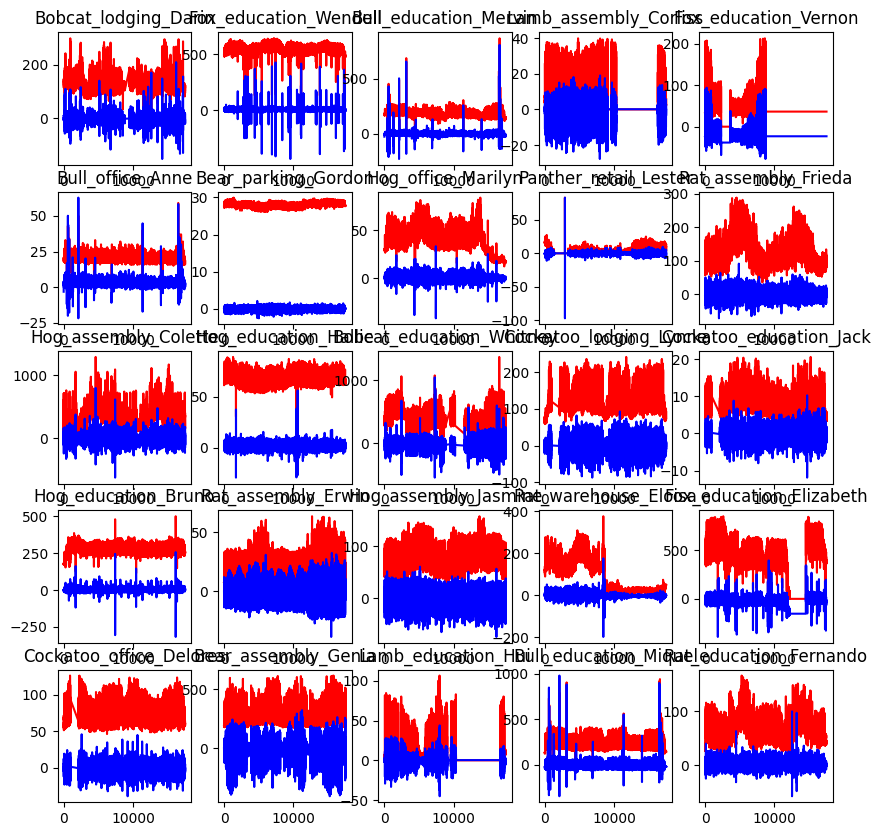

In [135]:
# get a bit of validation data, which are those of individual buildings
import random
random.seed(123)

fig, ax = plt.subplots(5,5, figsize=(10,10))
for i in range(25):
  samp = random.choice(dat.columns)
  location = samp.split("_")[0]

  # get the scaler and model corresponding to the validation sequence
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler.fit_transform(np.array(sub_dfs[location]).reshape(-1, 1))

  scaled_seq = scaler.fit_transform(np.array(dat[samp]).reshape(-1, 1))
  X_val, Y_val = create_dataset(scaled_seq, look_back)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
  val_predict = better_model[location].predict(X_val)

  val_predict = scaler.inverse_transform(val_predict)
  Y_val = scaler.inverse_transform([Y_val])

  # plot series, prediction and diff
  ax[i//5,i%5].plot(Y_val.flatten(), color="r")
  #ax[i//5,i%5].plot(val_predict.flatten(), color="g")
  ax[i//5,i%5].plot(Y_val.flatten() - val_predict.flatten(), color="b")
  ax[i//5,i%5].set_title(samp)

  val_mae, val_rmse, val_mape, val_r2, val_ev = compute_metrics(Y_val.flatten(), val_predict)
  print(f"{samp} → MAE: {val_mae:.3f}, RMSE: {val_rmse:.3f}, R²: {val_r2:.3f}, ExplVar: {val_ev:.3f}")

548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 1.0, 'Cockatoo_office_Delores')

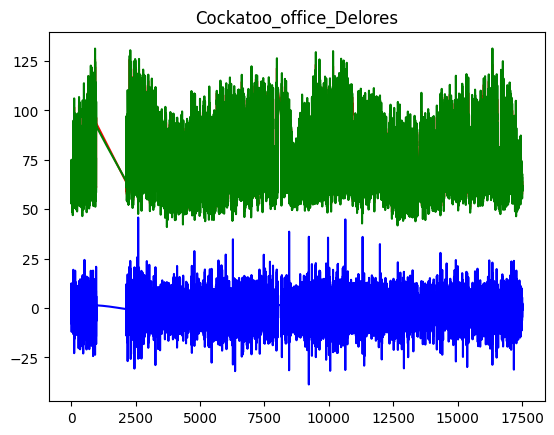

In [136]:
samp = "Cockatoo_office_Delores"

location = samp.split("_")[0]

# get the scaler and model corresponding to the validation sequence
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(np.array(sub_dfs[location]).reshape(-1, 1))

scaled_seq = scaler.fit_transform(np.array(dat[samp]).reshape(-1, 1))
X_val, Y_val = create_dataset(scaled_seq, look_back)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
val_predict = better_model[location].predict(X_val)

val_predict = scaler.inverse_transform(val_predict)
Y_val = scaler.inverse_transform([Y_val])

# plot series, prediction and diff
plt.plot(Y_val.flatten(), color="r")
plt.plot(val_predict.flatten(), color="g")
plt.plot(Y_val.flatten() - val_predict.flatten(), color="b")
plt.title(samp)


In [137]:
val_mae, val_rmse, val_mape, val_r2, val_ev = compute_metrics(Y_val.flatten(), val_predict)
print(f" Val  →  MAE: {val_mae:.3f},  RMSE: {val_rmse:.3f},  MAPE: {val_mape:.3%},  R²: {val_r2:.3f},  ExplVar: {val_ev:.3f}")

 Val  →  MAE: 4.193,  RMSE: 5.944,  MAPE: 5.737%,  R²: 0.855,  ExplVar: 0.855


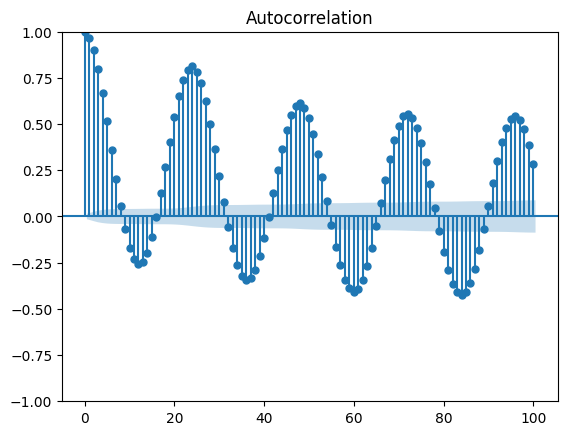

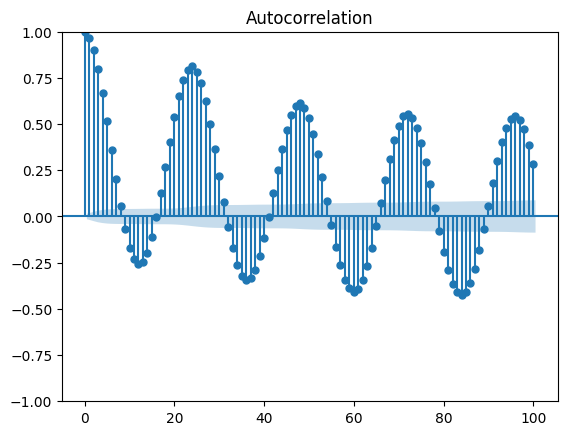

In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dat.mean(axis=1), lags=100, alpha=0.05)